In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv("http://data.mishra.us/files/project/OJ_data.csv")


In [ ]:
data.head()

,Purchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff
0,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24
1,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24
2,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23
3,0,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00
4,1,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00


In [ ]:
data.duplicated().sum()

83

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
missingdata=data.isna().sum()
missingdata.sort_values(ascending=False)

Purchase         0
PriceCH          0
PriceMM          0
DiscCH           0
DiscMM           0
SpecialCH        0
SpecialMM        0
LoyalCH          0
SalePriceMM      0
SalePriceCH      0
PriceDiff        0
PctDiscMM        0
PctDiscCH        0
ListPriceDiff    0
dtype: int64

In [ ]:
target=data.iloc[:,0]
target.head()

0    1
1    1
2    1
3    0
4    1
Name: Purchase, dtype: int64

In [ ]:
dataset=data.iloc[ :,1:14].apply(pd.to_numeric)
data

,Purchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff
0,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24
1,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24
2,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23
3,0,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00
4,1,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,0.000000,0.053763,0.23
1066,1,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,0.000000,0.000000,0.32
1067,0,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,0.000000,0.000000,0.32
1068,1,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,0.112676,0.000000,0.27


In [ ]:
targetclass=target.value_counts()
targetclass

1    608
0    379
Name: Purchase, dtype: int64

In [ ]:
# Calculating the percentage of target class.
percenttarget=(targetclass.values/len(data)*100)
percenttarget


array([61.60081054, 38.39918946])

In [ ]:
# Imblearn for the undersampling of the class variable.
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=0)
dataset, target_resampled = under_sampler.fit_resample(dataset,target)
#dataset["Purchase"] = target_resampled
#Since, this is an class imbalance problem we need to do undersampling from the imblearn library under sampling method to get the same class values.

target_resampled.value_counts()

0    379
1    379
Name: Purchase, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [ ]:
# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(dataset, target_resampled, test_size=0.20, random_state=42)

In [ ]:
# Importing the preprocessing methods from sklearn and transforming the datasets.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_valid)
X_valid_scaled = scaler.transform(X_valid)

In [ ]:
model = LogisticRegression()
model.fit(X_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict the fitted model on the validation dataset.
y_pred = model.predict(X_valid_scaled)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



Intercept: [0.07972831]
Coefficients: [[-0.07746269  0.0435197   0.02424826 -0.24941327 -0.03030843 -0.12281299
   2.02569985  0.23830775 -0.07731322  0.25968663  0.22261741  0.18975472
   0.12899243]]


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the test set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Accuracy: 0.84
RMSE: 0.41
ROC-AUC Score: 0.8371080139372823
Confusion Matrix:
[[67 15]
 [10 60]]
True Positives: 60
True Negatives: 67
False Negatives: 10
False Positives: 15
Sensitivity (Recall): 0.8571428571428571
Precision: 0.8
Specificity: 0.8170731707317073


In [ ]:
import statsmodels.api as sm

X_with_intercept = sm.add_constant(X_scaled)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_with_intercept)
result = logit_model.fit()

# Display the summary, including p-values
print(result.summary())

         Current function value: 0.390907
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  606
Model:                          Logit   Df Residuals:                      596
Method:                           MLE   Df Model:                            9
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.4359
Time:                        03:53:18   Log-Likelihood:                -236.89
converged:                      False   LL-Null:                       -419.93
Covariance Type:            nonrobust   LLR p-value:                 2.338e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.117      0.685      0.493      -0.149       0.309
x1            -0.4408   1.36e+06  -3.24e-07      1.000   -2.67e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
log_likelihood = result.llf

# Calculate AIC
num_params = len(result.params)
aic = 2 * num_params - 2 * log_likelihood
aic

501.77932167492645

In [ ]:
# Import the libraries for the VIF from the statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a Pandas DataFrame to store the VIFs
vif_data = pd.DataFrame({'variable': X_train.columns})

# Calculating VIF for every column in train dataset.
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
# Print the VIFs
print(vif_data)


         variable         VIF
0         PriceCH         inf
1         PriceMM         inf
2          DiscCH         inf
3          DiscMM         inf
4       SpecialCH    1.920833
5       SpecialMM    1.874833
6         LoyalCH    4.084527
7     SalePriceMM         inf
8     SalePriceCH         inf
9       PriceDiff         inf
10      PctDiscMM  572.549034
11      PctDiscCH  602.048674
12  ListPriceDiff         inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Import the linear_model for LASSO regression.
from sklearn import linear_model

# Hyperparameter tuning for LASSO penalization.
param_grid = {'alpha': [0.001,0.01,0.1,10]}

reg = linear_model.Lasso()

# Grid search the right parameters
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e-02, tolerance: 1.212e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 10]})

In [ ]:
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Fit the model with the best alpha to the training data
best_lasso_model = linear_model.Lasso(alpha=0.01)
linreg_model=best_lasso_model.fit(X_scaled, y_train)
print("Intercept:", linreg_model.intercept_)
print("Coefficients:", linreg_model.coef_)

non_zero_coeffs = np.where(linreg_model.coef_ != 0)[0]

# Print the non-zero coefficients and their corresponding predictors
print("Non-zero coefficients:", linreg_model.coef_[non_zero_coeffs])
print("Corresponding predictors:", non_zero_coeffs)



Best Alpha: 0.01
Intercept: 0.5099009900990099
Coefficients: [ 0.          0.0058381   0.         -0.          0.         -0.01348456
  0.31458064  0.         -0.          0.07752754 -0.          0.
  0.00764817]
Non-zero coefficients: [ 0.0058381  -0.01348456  0.31458064  0.07752754  0.00764817]
Corresponding predictors: [ 1  5  6  9 12]


In [ ]:
coefficients = best_lasso_model.coef_
feature_names = dataset.columns

# Combine coefficients and feature names into a DataFrame for better readability
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients
print(coefficients_df)


          Feature  Coefficient
0         PriceCH     0.000000
1         PriceMM     0.005838
2          DiscCH     0.000000
3          DiscMM    -0.000000
4       SpecialCH     0.000000
5       SpecialMM    -0.013485
6         LoyalCH     0.314581
7     SalePriceMM     0.000000
8     SalePriceCH    -0.000000
9       PriceDiff     0.077528
10      PctDiscMM    -0.000000
11      PctDiscCH     0.000000
12  ListPriceDiff     0.007648


In [ ]:
# Make predictions on the test data
y_pred = best_lasso_model.predict(X_valid_scaled)

y_pred = pd.DataFrame({'pred': y_pred})

y_pred['pred'] = pd.to_numeric(y_pred['pred'])

# Threshold for the class.
threshold = 0.5

# Giving class label for every output.
y_pred = [1 if pred > threshold else 0 for pred in y_pred['pred']]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the valid set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Confusion Matrix:
[[67 15]
 [ 9 61]]
Accuracy: 0.84
RMSE: 0.40
ROC-AUC Score: 0.8442508710801395
True Positives: 61
True Negatives: 67
False Negatives: 9
False Positives: 15
Sensitivity (Recall): 0.8714285714285714
Precision: 0.8026315789473685
Specificity: 0.8170731707317073


In [ ]:
newx_train=X_train.iloc[:,[1,5,6,9,12]]

In [ ]:
newx_train

,PriceMM,SpecialMM,LoyalCH,PriceDiff,ListPriceDiff
212,1.79,1,0.053687,0.00,0.00
69,1.69,0,0.373760,0.00,0.00
626,2.09,0,0.933497,0.23,0.23
131,2.13,0,0.337550,0.03,0.27
44,1.79,0,0.027488,0.00,0.00
...,...,...,...,...,...
71,1.99,1,0.351365,0.10,0.24
106,1.69,0,0.204800,0.00,0.00
270,2.09,0,0.083886,0.30,0.30
435,1.69,0,0.500000,0.10,0.00


In [ ]:
model = LogisticRegression()
model.fit(newx_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_valid.iloc[:,[1,5,6,9,12]])

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-3.7887017]
Coefficients: [[ 0.37448643 -0.32912215  5.33264989  1.74629563  0.45598581]]


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the test set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Accuracy: 0.83
RMSE: 0.41
ROC-AUC Score: 0.8299651567944252
Confusion Matrix:
[[67 15]
 [11 59]]
True Positives: 59
True Negatives: 67
False Negatives: 11
False Positives: 15
Sensitivity (Recall): 0.8428571428571429
Precision: 0.7972972972972973
Specificity: 0.8170731707317073


In [ ]:
X_with_intercept = sm.add_constant(newx_train)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_with_intercept)
result = logit_model.fit()

# Display the summary, including p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.393328
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  606
Model:                          Logit   Df Residuals:                      600
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.4324
Time:                        03:53:18   Log-Likelihood:                -238.36
converged:                       True   LL-Null:                       -419.93
Covariance Type:            nonrobust   LLR p-value:                 2.588e-76
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.0756      2.081     -1.958      0.050      -8.155       0.004
PriceMM           0.

In [ ]:
log_likelihood = result.llf

# Calculate AIC
num_params = len(result.params)
aic = 2 * num_params - 2 * log_likelihood
aic

488.7135399181619

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150, 170],
    'learning_rate': [ 0.01,0.05,0.1, 0.5,1],
    'max_depth': [1,2,3,4,5],
}
# Create an XGBoost classifier
xgbmodel = XGBClassifier(objective='binary:logistic', eval_metric='auc', nthread=4, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgbmodel, param_grid=param_grid, scoring='roc_auc', cv=5)

# Perform hyperparameter tuning
grid_search.fit(X_train,y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Fit the best model to the training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict_proba(X_train)[:, 1]

# Calculate the ROC-AUC score on the test set
roc_auc = roc_auc_score(y_train, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.9147352707223257


In [ ]:
best_params

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}

In [ ]:
# Applying best_parameters
xgbmodel = XGBClassifier(objective='binary:logistic', eval_metric='auc',learning_rate = 0.1, max_depth = 1, n_estimators = 150,random_state=25,n_jobs=-1)
xgbmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbmodel.predict_proba(X_valid)[:, 1]

y_pred = pd.DataFrame({'pred': y_pred})

y_pred['pred'] = pd.to_numeric(y_pred['pred'])

# Threshold for the class.
threshold = 0.5

# Giving class label for every output.
y_pred = [1 if pred > threshold else 0 for pred in y_pred['pred']]

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the valid set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Accuracy on the test set: 0.84
RMSE: 0.41
ROC-AUC Score: 0.8339721254355401
Confusion Matrix:
[[70 12]
 [13 57]]
True Positives: 57
True Negatives: 70
False Negatives: 13
False Positives: 12
Sensitivity (Recall): 0.8142857142857143
Precision: 0.8260869565217391
Specificity: 0.8536585365853658


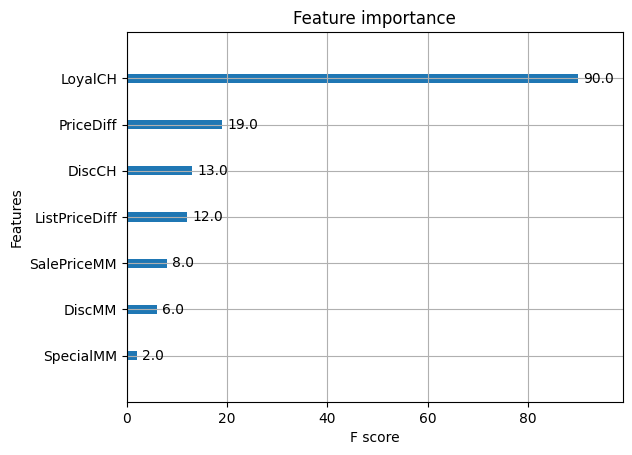

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgbmodel)
plt.show()